>
# Project: Wrangling and Analyze Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
 <li><a href="#gathering">Gathering   
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#wrangling">Wrangling Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
# Introduction:
> In this project, we gather, assess, and clean data then act on it wrangling the data.
 - WeRateDogs Twitter archive was downloaded from Ucadity ( given to us by dowloading it from the classroom)
 - Twitter Image Prediction (Image_predictions.tsv) was dowloaded programmatically from URL using the Requests library
 - Additional data from Twitter was downloaded using Twitter API (Tweepy) as stored as tweets_data.txt
<br> Data was then assessed visually and programmatically before being cleaned for exploratory analysis
<br> NB: API keys were removed from the work before submitting

<a id='gathering'></a>
# Gathering Data

#### Importing Libraries

In [3]:
import pandas as pd
import matplotlib as plt
import requests
import tweepy
import json
import numpy as np
import re
import ipynb.fs.full.funct as funct

### 1. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
The WeRateDogs Twitter archive
> - Reading the data into a pandas DataFrame

In [4]:
data = pd.read_csv('twitter-archive-enhanced.csv')
df = pd.DataFrame(data)

In [5]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### 2. Used the Requests library to download the tweet image prediction (image_predictions.tsv)
Twitter Image Prediction (Image_predictions.tsv)
> - Downloading data programmatically from URL using the Requests library

In [16]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [7]:
image_prediction = pd.read_csv('image_predictions.tsv')

 ### 3. Used the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
 Additional data from the Twitter API
> - Using Tweepy Library
> * Removed my Twitter API keys, secrets and tokens from the code after usuage

In [5]:
consumer_key = ''
consumer_secret = ''

access_token = ''

access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


#### Querying Twitter API for json data for each tweet id in the twitter archive
> -  Saving each tweet's returned JSON as a new line in a .txt file ( in a file tweet_json.txt specifically)

In [14]:
for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        with open('tweet_json.txt', 'a+') as file:
            json.dump(tweet._json, file)
            file.write('\n')
        print (tweet_id, 'success')
    except:
        print (tweet_id, 'Failed')

892420643555336193 success
892177421306343426 success
891815181378084864 success
891689557279858688 success
891327558926688256 success
891087950875897856 success
890971913173991426 success
890729181411237888 success
890609185150312448 success
890240255349198849 success
890006608113172480 success
889880896479866881 success
889665388333682689 success
889638837579907072 success
889531135344209921 success
889278841981685760 success
888917238123831296 success
888804989199671297 success
888554962724278272 success
888202515573088257 Failed
888078434458587136 success
887705289381826560 success
887517139158093824 success
887473957103951883 success
887343217045368832 success
887101392804085760 success
886983233522544640 success
886736880519319552 success
886680336477933568 success
886366144734445568 success
886267009285017600 success
886258384151887873 success
886054160059072513 success
885984800019947520 success
885528943205470208 success
885518971528720385 success
885311592912609280 success
88

836260088725786625 success
836001077879255040 success
835685285446955009 success
835574547218894849 success
835536468978302976 success
835309094223372289 success
835297930240217089 success
835264098648616962 success
835246439529840640 success
835172783151792128 success
835152434251116546 success
834931633769889797 success
834786237630337024 success
834574053763584002 success
834477809192075265 success
834458053273591808 success
834209720923721728 success
834167344700198914 success
834089966724603904 success
834086379323871233 success
833863086058651648 success
833826103416520705 success
833732339549220864 success
833722901757046785 success
833479644947025920 success
833124694597443584 success
832998151111966721 success
832769181346996225 success
832757312314028032 success
832682457690300417 success
832645525019123713 success
832636094638288896 success
832397543355072512 success
832369877331693569 success
832273440279240704 success
832215909146226688 success
832215726631055365 success
8

797545162159308800 success
797236660651966464 success
797165961484890113 success
796904159865868288 success
796865951799083009 success
796759840936919040 success
796563435802726400 success
796484825502875648 success
796387464403357696 success
796177847564038144 success
796149749086875649 success
796125600683540480 success
796116448414461957 success
796080075804475393 success
796031486298386433 success
795464331001561088 success
795400264262053889 success
795076730285391872 success
794983741416415232 success
794926597468000259 success
794355576146903043 success
794332329137291264 success
794205286408003585 success
793962221541933056 success
793845145112371200 success
793614319594401792 success
793601777308463104 success
793500921481273345 success
793286476301799424 success
793271401113350145 success
793256262322548741 success
793241302385262592 success
793226087023144960 success
793210959003287553 success
793195938047070209 success
793180763617361921 success
793165685325201412 success
7

757400162377592832 success
757393109802180609 success
757354760399941633 success
756998049151549440 success
756939218950160384 success
756651752796094464 success
756526248105566208 success
756303284449767430 success
756288534030475264 success
756275833623502848 success
755955933503782912 success
755206590534418437 success
755110668769038337 success
754874841593970688 success
754856583969079297 success
754747087846248448 success
754482103782404096 success
754449512966619136 success
754120377874386944 success
754011816964026368 Failed
753655901052166144 success
753420520834629632 success
753398408988139520 success
753375668877008896 success
753298634498793472 success
753294487569522689 success
753039830821511168 success
753026973505581056 success
752932432744185856 success
752917284578922496 success
752701944171524096 success
752682090207055872 success
752660715232722944 success
752568224206688256 success
752519690950500352 success
752334515931054080 success
752309394570878976 success
75

714962719905021952 success
714957620017307648 success
714631576617938945 success
714606013974974464 success
714485234495041536 success
714258258790387713 success
714251586676113411 success
714214115368108032 success
714141408463036416 success
713919462244790272 success
713909862279876608 success
713900603437621249 success
713761197720473600 success
713411074226274305 success
713177543487135744 success
713175907180089344 success
712809025985978368 success
712717840512598017 success
712668654853337088 success
712438159032893441 success
712309440758808576 success
712097430750289920 success
712092745624633345 success
712085617388212225 success
712065007010385924 success
711998809858043904 success
711968124745228288 success
711743778164514816 success
711732680602345472 success
711694788429553666 success
711652651650457602 success
711363825979756544 success
711306686208872448 success
711008018775851008 success
710997087345876993 success
710844581445812225 success
710833117892898816 success
7

690690673629138944 success
690649993829576704 success
690607260360429569 success
690597161306841088 success
690400367696297985 success
690374419777196032 success
690360449368465409 success
690348396616552449 success
690248561355657216 success
690021994562220032 success
690015576308211712 success
690005060500217858 success
689999384604450816 success
689993469801164801 success
689977555533848577 success
689905486972461056 success
689877686181715968 success
689835978131935233 success
689661964914655233 success
689659372465688576 success
689623661272240129 success
689599056876867584 success
689557536375177216 success
689517482558820352 success
689289219123089408 success
689283819090870273 success
689280876073582592 success
689275259254616065 success
689255633275777024 success
689154315265683456 success
689143371370250240 success
688916208532455424 success
688908934925697024 success
688898160958271489 success
688894073864884227 success
688828561667567616 success
688804835492233216 success
6

676470639084101634 success
676440007570247681 success
676430933382295552 success
676263575653122048 success
676237365392908289 success
676219687039057920 success
676215927814406144 success
676191832485810177 success
676146341966438401 success
676121918416756736 success
676101918813499392 success
676098748976615425 success
676089483918516224 success
675898130735476737 success
675891555769696257 success
675888385639251968 success
675878199931371520 success
675870721063669760 success
675853064436391936 success
675849018447167488 success
675845657354215424 success
675822767435051008 success
675820929667219457 success
675798442703122432 success
675781562965868544 success
675740360753160193 success
675710890956750848 success
675707330206547968 success
675706639471788032 success
675534494439489536 success
675531475945709568 success
675522403582218240 success
675517828909424640 success
675501075957489664 success
675497103322386432 success
675489971617296384 success
675483430902214656 success
6

670290420111441920 success
670093938074779648 success
670086499208155136 success
670079681849372674 success
670073503555706880 success
670069087419133954 success
670061506722140161 success
670055038660800512 success
670046952931721218 success
670040295598354432 success
670037189829525505 success
670003130994700288 success
669993076832759809 success
669972011175813120 success
669970042633789440 success
669942763794931712 success
669926384437997569 success
669923323644657664 success
669753178989142016 success
669749430875258880 success
669684865554620416 success
669683899023405056 success
669682095984410625 success
669680153564442624 success
669661792646373376 success
669625907762618368 success
669603084620980224 success
669597912108789760 success
669583744538451968 success
669573570759163904 success
669571471778410496 success
669567591774625800 success
669564461267722241 success
669393256313184256 success
669375718304980992 success
669371483794317312 success
669367896104181761 success
6

#### Reading the tweet_json.txt line by line into a pandas dataFrame with:
> - tweet ID
> - retweet count
> - favourite count

In [9]:
mydf_list = []
with open('tweet_json.txt') as file:
    for line in file:
        mydf_list.append(json.loads(line))

In [10]:
tweets_data = pd.DataFrame(mydf_list, columns=['id', 'retweet_count', 'favourite_count'])

In [11]:
tweets_data.head(5)

,id,retweet_count,favourite_count
0,892420643555336193,7024,NaN
1,892177421306343426,5304,NaN
2,891815181378084864,3488,NaN
3,891689557279858688,7236,NaN
4,891327558926688256,7775,NaN


<a id='assessing'></a>
# Assessing Data

##  Visual assessment

#### Displaying data in twitter-archive-enhanced.csv which was given to us to download manually

In [12]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Displaying data from Twitter Image Prediction (Image_predictions.tsv) which programmatically downloaded using the requests library

In [13]:
tweets_data.head()

,id,retweet_count,favourite_count
0,892420643555336193,7024,NaN
1,892177421306343426,5304,NaN
2,891815181378084864,3488,NaN
3,891689557279858688,7236,NaN
4,891327558926688256,7775,NaN


In [14]:
image_prediction.head()

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [15]:
# reading given tsv file
with open("image_predictions.tsv", 'r') as myfile:  
  with open("image_predictions.csv", 'w') as csv_file:
    for line in myfile:
        
      # Replace every tab with comma
      fileContent = re.sub("\t", ",", line)
        
      # Writing into csv file
      csv_file.write(fileContent)

In [16]:
image_predictions = pd.read_csv('image_predictions.csv')

In [17]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Programmatic Asssesment using pandas functions 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2323 non-null   int64  
 1   retweet_count    2323 non-null   int64  
 2   favourite_count  0 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 54.6 KB


##### Checking for duplicate data in twitter-archive-enhanced table

In [21]:
sum(df.duplicated())

0

> - No duplicate data

##### Checking for duplicate data in tweets_data table

In [22]:
sum(tweets_data.duplicated())

0

> - No duplicate data

##### Checking for duplicate data in image_predictions table

In [23]:
sum(image_predictions.duplicated())

0

> - No duplicate data

###### Trying to find clues on what to clean from image_predictions table

In [24]:
image_predictions.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1908,852672615818899456,https://pbs.twimg.com/media/C9VNNp1XkAEWRFb.jpg,1,golden_retriever,0.711235,True,otterhound,0.068235,True,Sussex_spaniel,0.046562,True
521,676575501977128964,https://pbs.twimg.com/media/CWOt07EUsAAnOYW.jpg,1,feather_boa,0.424106,False,Yorkshire_terrier,0.073144,True,Shetland_sheepdog,0.057598,True
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_Dinmont,0.175915,True,black-footed_ferret,0.096534,False,toy_poodle,0.064145,True
1289,751251247299190784,https://pbs.twimg.com/ext_tw_video_thumb/75125...,1,Walker_hound,0.178852,True,German_short-haired_pointer,0.115752,True,English_foxhound,0.113796,True
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
406,673708611235921920,https://pbs.twimg.com/media/CVl-Z0dWcAAs7wr.jpg,1,golden_retriever,0.936333,True,cocker_spaniel,0.024211,True,Labrador_retriever,0.009435,True
950,704859558691414016,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,1,pug,0.284428,True,teddy,0.156339,False,mitten,0.138915,False


###### Trying to find clues on what to clean from tweets_data table

In [25]:
tweets_data.sample(8)

,id,retweet_count,favourite_count
226,847157206088847362,5268,NaN
1271,707420581654872064,637,NaN
776,772877495989305348,3585,NaN
85,875747767867523072,3590,NaN
1456,692919143163629568,700,NaN
1390,698178924120031232,680,NaN
1659,681320187870711809,674,NaN
1268,707693576495472641,920,NaN


###### Trying to find clues on what to clean from twitter_archive_enhannced  table

In [26]:
df.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
1787,677565715327688705,NaN,NaN,2015-12-17 19:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677565715...,6,10,None,None,None,None,None
2011,672245253877968896,NaN,NaN,2015-12-03 02:45:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snickers. He's adorable. Also comes in t-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672245253...,12,10,Snickers,None,None,None,None
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,None,None,None
2047,671518598289059840,NaN,NaN,2015-12-01 02:38:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scruffers. He's being violated on mult...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671518598...,9,10,Scruffers,None,None,None,None
683,788412144018661376,NaN,NaN,2016-10-18 16:11:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He breaks hearts for a living....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788412144...,11,10,Dexter,None,None,None,None
1847,675820929667219457,NaN,NaN,2015-12-12 23:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a handful of sleepy puppers. All look u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675820929...,11,10,None,None,None,None,None
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680085611...,12,10,by,None,None,None,None


In [27]:
tweets_data.describe()

,id,retweet_count,favourite_count
count,2.323000e+03,2323.000000,0.0
mean,7.417642e+17,2477.195867,NaN
std,6.826313e+16,4195.600117,NaN
min,6.660209e+17,1.000000,NaN
25%,6.780222e+17,494.500000,NaN
50%,7.175377e+17,1149.000000,NaN
75%,7.986692e+17,2869.000000,NaN
max,8.924206e+17,70884.000000,NaN


In [28]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
df[df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [30]:
tweets_data[tweets_data['favourite_count'].isnull()]

,id,retweet_count,favourite_count
0,892420643555336193,7024,NaN
1,892177421306343426,5304,NaN
2,891815181378084864,3488,NaN
3,891689557279858688,7236,NaN
4,891327558926688256,7775,NaN
...,...,...,...
2318,666049248165822465,37,NaN
2319,666044226329800704,115,NaN
2320,666033412701032449,36,NaN
2321,666029285002620928,39,NaN


In [31]:
image_predictions[image_predictions['p1'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Quality Issues

> ## Quality Issues : Visual Assessment

#### twitter-archive-enhanced table
1. Empty, NaN or missing values in `in_reply_to_status_id` column 

2. Empty, NaN or missing values in `in_reply_to_user_id` column

3. Empty, NaN or missing values in `retweeted_status_id` column

4. Empty, NaN or missing values in `retweeted_status_timestamp` column

5. Some missing values in `expanded_urls` column

6. Values in`rating_numerator` column  is greater than (>) `rating_denominator` column
7. Inconsistency in lettering of values in `name` column. Some values begin with lowercase while other values begin with uppercase or symbols
8. `source` column contain url instead of a string or text



#### tweets_data table

8. Empty, NaN or missing values in `favourite_count` column <br>

#### image_predictions table

- Columns `p1`, `p2`, `p3` need descriptive names. This will make it easier to understand what they represent

- Columns `p1_conf`, `p2_conf` and `p3_conf` need descriptive names. This will make it easier to understand what they represent 

- Columns `p1_dog`, `p2_dog` and `p3_dog` need descriptive names. This will make it easier to understand what they represent

- Inconsistency in lettering of values in columns `p1`, `p2` and `p3`. Some values begin with lowercase while other values begin with uppercase
 

> ## Quality Issues: Programmatic Assessment

#### twitter-archive-enhanced table
9. Datatype of column `timestamp` is object instead of datetime
10. Datatype of column `retweeted_status_timestamp` is object instead of datetime
11. Datatype of `in_reply_to_status_id` is float instead of int
12. Datatype of `in_reply_to_user_id` is float instead of int 
13. Some missing values in expanded_urls column
14. New `day` column should be added to the table

#### tweets_data table
14. Datatype of `favourite_count` column is float instead of int
15. Empty, NaN or missing values in `favourite_count` column

# Tidy Assessment Issues

### Tidiness : Visual Assessment

> ####  twitter-archive-enhanced table
1. `timestamp` can have two columns: date column, time column
2. clean the `source` column
3. new column `ratings` which would hold the final ratings ( rating_numerator / rating_denominator)

#### tweets_data
4. Column `id` should be renamed as `tweet_id` for consistency in the other datasets especially when it comes to merging all the datasets

### Tidiness : Programatic Assessment

#### twitter-archive-enhanced table

In [32]:
df.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

- `timestamp` should be split into two separate columns namely: date column and time column 
- The three tables should be merged as one 
- new column `ratings` which would hold the final ratings ( rating_numerator / rating_denominator)
- unwanted columns in twitter archive enhanced should be dropped (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, 

<a id='cleaning'></a>
# Cleaning Data

##  Making copies of the original data

In [33]:
twitter_archive_enhanced_clean = df.copy()
tweet_data_clean = tweets_data.copy()
image_predictions_clean = image_predictions.copy()

##### Viewing the name counts in the twitter_archive_enhanced table

In [34]:
twitter_archive_enhanced_clean['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Cleaning tweet_data copy

### Issue 1: Empty, NaN or missing values in `favourite_count` column

#### Define
- **Missing Data** 

>`favourite_count` has NaN values : Changing dataype from float to int in attempts to recover the data


#### Code

In [35]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2323 non-null   int64  
 1   retweet_count    2323 non-null   int64  
 2   favourite_count  0 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 54.6 KB


In [36]:
tweet_data_clean.head()

,id,retweet_count,favourite_count
0,892420643555336193,7024,NaN
1,892177421306343426,5304,NaN
2,891815181378084864,3488,NaN
3,891689557279858688,7236,NaN
4,891327558926688256,7775,NaN


##### Since `favourite_count` column has 0 non-null values (missing values), we will drop it

In [37]:
tweet_data_clean.drop(columns = 'favourite_count', inplace = True)

#### Test

In [38]:
tweet_data_clean.head()

,id,retweet_count
0,892420643555336193,7024
1,892177421306343426,5304
2,891815181378084864,3488
3,891689557279858688,7236
4,891327558926688256,7775


### Issue 2: Renaming column `id` as `tweet_id`

### Define :
> Renaming column `id` as `tweet_id`

### Code

In [39]:
tweet_data_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test

In [40]:
tweet_data_clean.head()

,tweet_id,retweet_count
0,892420643555336193,7024
1,892177421306343426,5304
2,891815181378084864,3488
3,891689557279858688,7236
4,891327558926688256,7775


   ### Cleaning twitter_archive_enhanced_clean

### Issue 3

#### Define
- Converting timestamp in twitter_archive_enhanced_clean from object to date time


#### Code

In [144]:
pd.isna(df)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


######  Converting timestamp in twitter_archive_enhanced_clean from object to date time 
- Creating the date (day) column, and year column from timestamp.

In [145]:
twitter_archive_enhanced_clean["timestamp"] = twitter_archive_enhanced_clean["timestamp"].astype('datetime64[ns]')

#### Test

In [42]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue 4

#### Define
> - New `day` column should be added to the table

#### Code

In [146]:
twitter_archive_enhanced_clean['day'] = twitter_archive_enhanced_clean['timestamp'].dt.date

#### I want to further define the `day` column whether it is a weekday or an weekend  into a new column `day_type` column in order to develop a question to explore later

In [278]:
twitter_archive_enhanced_clean['day_type'] = twitter_archive_enhanced_clean.apply(lambda x: funct.weekend_or_weekday(x), axis = 1)

#### Test

In [44]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [147]:
twitter_archive_enhanced_clean['year'] = twitter_archive_enhanced_clean['timestamp'].dt.year

### Issue #5: Unwanted columns in twitter archive enhanced should be dropped

##### Define
> - Removing the `retweeted_status_id` in the copy of twitter_archive_enhanced

#### Code

In [148]:
twitter_archived_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['retweeted_status_id'].isnull()]

#### Test

In [45]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [149]:
 twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['in_reply_to_status_id'].isnull()]

##### Dropping unwanted columns in twitter archive enhanced

In [150]:
unwanted_columns_twitter_enhanced = ['in_reply_to_status_id',
                                'in_reply_to_user_id',
                                'retweeted_status_id',
                                'retweeted_status_user_id',
                                'retweeted_status_timestamp']

In [151]:
twitter_archive_enhanced_clean.drop(columns = unwanted_columns_twitter_enhanced, inplace = True)
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,year
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,2017
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,2017
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,2017
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,2017
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,2017


### Issue #6: Cleaning the `source` column 

###### Define
- Using Regex to clean the `source` column in the table. Removing the url attached to the sourc or device type

#### Code

In [152]:
trend =">(.*)</"
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean.apply(lambda x: str(re.findall(trend, x['source'])).strip("['']"), axis = 1)
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,year
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,2017
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,2017
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,2017
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,2017
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,2017


In [ ]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean['name'].str.islower()]
twitter_archive_enhanced_clean['name'].unique()

#### Test

In [ ]:
twitter_archive_enhanced_clean.head()

### Issue #7: Missing values in column `name` in twitter_archive_enchanced_clean 

##### Define
- Getting rid of rows with name = "None" in the table

#### Code

In [153]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['name'] != 'None']

#### Test

In [ ]:
twitter_archive_enhanced_clean.head()

### Issue #8 : Creating a ratings column

#### Define
> - New column ratings which would hold the final ratings ( rating_numerator / rating_denominator)

#### Code

- Creating a new column `ratings` which would hold the final ratings ( rating_numerator / rating_denominator)

In [154]:
twitter_archive_enhanced_clean['ratings'] = twitter_archive_enhanced_clean.apply(lambda x: x['rating_numerator']/x['rating_denominator'], axis = 1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,year,ratings
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,2017,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,2017,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,2017,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,2017,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,2017,1.2


> Since we now have a rating column, we can now drop the rating_numerator and rating denominator

In [155]:
twitter_archive_enhanced_clean.drop(columns = ['rating_numerator', 'rating_denominator'], inplace = True)

#### Test

In [ ]:
twitter_archive_enhanced_clean.head()

### Issue #9

#### Define
- Inconsistency in lettering of values in name column. Some values begin with lowercase while other values begin with uppercase or symbols

#### Code

> Detecting names with inappropriate characters ( %,&, and many others) in the twitter archive data

In [156]:
twitter_archive_enhanced_clean['inappropriate_characters'] = twitter_archive_enhanced_clean.apply(lambda x: funct.check_invalid_characters(x['name']), axis = 1)
twitter_archive_enhanced_clean.head(40)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,year,ratings,inappropriate_characters
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,2017-08-01,2017,1.3,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,2017-08-01,2017,1.3,False
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,2017-07-31,2017,1.2,False
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,2017-07-30,2017,1.3,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,2017-07-29,2017,1.2,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,2017-07-28,2017,1.3,False
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,2017-07-27,2017,1.3,False
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,2017-07-26,2017,1.4,False
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,None,None,None,None,2017-07-26,2017,1.3,False
11,889880896479866881,2017-07-25 16:11:53,Twitter for iPhone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,Bruno,None,None,None,None,2017-07-25,2017,1.3,False


In [157]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['inappropriate_characters']== 'True']

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,year,ratings,inappropriate_characters


> ##### From the result, there is not any name that has inappropriate characters. Hence, names might rather have accents on them which is appropriate.
- **Hence we need to drop the `inappropriate_characters` column in the table because we won't need it**

In [ ]:
twitter_archive_enhanced_clean.drop(columns = 'inappropriate_characters', inplace = True)

> ###### Getting rid of names in lowercase in the table

In [ ]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean['name'].str.islower()]
twitter_archive_enhanced_clean['name'].unique()

#### Test

In [158]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,year,ratings
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,2017-08-01,2017,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,2017-08-01,2017,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,2017-07-31,2017,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,2017-07-30,2017,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,2017-07-29,2017,1.2


### Cleaning Image prediction_clean 

### Issue #10 

#### Define

- Cleaning Image prediction data copy

#### Code

In [280]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### checking to see if `img_num`  column has diferent values

In [281]:
image_predictions_clean['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

> ##### Since it does, I don't think image_predictions_clean needs to be cleaned

#### Test 

In [282]:
twitter_archive_enhanced_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,year,ratings,day_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,2017-08-01,2017,1.3,weekday
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,2017-08-01,2017,1.3,weekday
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,2017-07-31,2017,1.2,weekday
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,2017-07-30,2017,1.3,weekday
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,2017-07-29,2017,1.2,weekday


## Final Results of Data Cleaning

##### Viewing samples of each data to have a general check of a successful data cleaning

In [283]:
image_predictions_clean.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
1830,836260088725786625,https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg,1,borzoi,0.564688,True,ice_bear,0.078267,False,Pembroke,0.057916,True
268,670811965569282048,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,basset,0.994090,True,Walker_hound,0.003973,True,beagle,0.001406,True
531,676821958043033607,https://pbs.twimg.com/media/CWSN-vaXAAA8Ehr.jpg,2,Great_Pyrenees,0.869804,True,kuvasz,0.079814,True,standard_poodle,0.013263,True


In [284]:
tweet_data_clean.sample(5)

,tweet_id,retweet_count
1961,672604026190569472,339
327,832040443403784192,8854
2068,670691627984359425,210
438,818259473185828864,2091
1470,692041934689402880,1137


In [285]:
twitter_archive_enhanced_clean.sample(30)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,day,year,ratings,day_type
1756,678767140346941444,2015-12-21 02:41:11,Twitter for iPhone,This is Mia. She makes awful decisions. 8/10 h...,https://twitter.com/dog_rates/status/678767140...,Mia,None,None,None,None,2015-12-21,2015,0.8,weekday
511,811985624773361665,2016-12-22 17:23:53,Twitter for iPhone,Say hello to Ted. He accidentally opened the f...,https://twitter.com/dog_rates/status/811985624...,Ted,None,None,None,None,2016-12-22,2016,1.1,weekday
1651,683498322573824003,2016-01-03 04:01:13,Twitter for iPhone,This is Griffin. He's desperate for both a phy...,https://twitter.com/dog_rates/status/683498322...,Griffin,None,None,None,None,2016-01-03,2016,1.1,weekday
2160,669567591774625800,2015-11-25 17:25:28,Twitter for iPhone,Meet Kollin. He's a Parakeetian Badminton from...,https://twitter.com/dog_rates/status/669567591...,Kollin,None,None,None,None,2015-11-25,2015,0.9,weekday
122,869227993411051520,2017-05-29 16:24:37,Twitter for iPhone,This is Gizmo. His favorite thing is standing ...,https://twitter.com/dog_rates/status/869227993...,Gizmo,None,None,None,None,2017-05-29,2017,1.3,weekday
1719,680161097740095489,2015-12-24 23:00:17,Twitter for iPhone,Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,Goliath,None,None,None,None,2015-12-24,2015,1.2,weekday
1927,674051556661161984,2015-12-08 02:23:09,Twitter for iPhone,This is Lucy. She knits. Specializes in tobogg...,https://twitter.com/dog_rates/status/674051556...,Lucy,None,None,None,None,2015-12-08,2015,1.0,weekday
2082,670815497391357952,2015-11-29 04:04:12,Twitter for iPhone,This is Sage. He likes to burn shit. 10/10 htt...,https://twitter.com/dog_rates/status/670815497...,Sage,None,None,None,None,2015-11-29,2015,1.0,weekday
345,831939777352105988,2017-02-15 18:54:34,Twitter for iPhone,This is Emanuel. He's a h*ckin rare doggo. Dwe...,https://twitter.com/dog_rates/status/831939777...,Emanuel,doggo,None,None,None,2017-02-15,2017,1.2,weekday
768,777621514455814149,2016-09-18 21:33:11,Twitter for iPhone,This is Derek. You can't look at him and not s...,https://twitter.com/dog_rates/status/777621514...,Derek,None,None,None,None,2016-09-18,2016,1.2,weekday


<a id='storing'></a>
# Storing Data

### Merging All 3 cleaned data copies

In [286]:
twitter_archive_master = pd.merge(pd.merge(image_predictions_clean, twitter_archive_enhanced_clean, on = 'tweet_id'), tweet_data_clean, on = 'tweet_id')
twitter_archive_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,name,doggo,floofer,pupper,puppo,day,year,ratings,day_type,retweet_count
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,a,None,None,None,None,2015-11-15,2015,0.7,weekday,39
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,a,None,None,None,None,2015-11-15,2015,0.9,weekday,36
2,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,a,None,None,None,None,2015-11-16,2015,0.6,weekday,115
3,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,a,None,None,None,None,2015-11-16,2015,1.0,weekday,50
4,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,an,None,None,None,None,2015-11-16,2015,0.2,weekday,707


In [287]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

<a id='wrangling'></a>
# Wrangling Data

In [288]:
def label(x,y,t):
    """
    Args:
    x (str): x-axis
    y (str): y-axis
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

### Question 1: How many tweets posted yearly?

In [289]:
tweet_per_year = twitter_archive_master['year'].value_counts()
tweet_per_year

2016    752
2015    431
2017    299
Name: year, dtype: int64

<AxesSubplot:title={'center':'Tweets on yearly basis'}, xlabel='Year', ylabel='Frequency of tweets'>

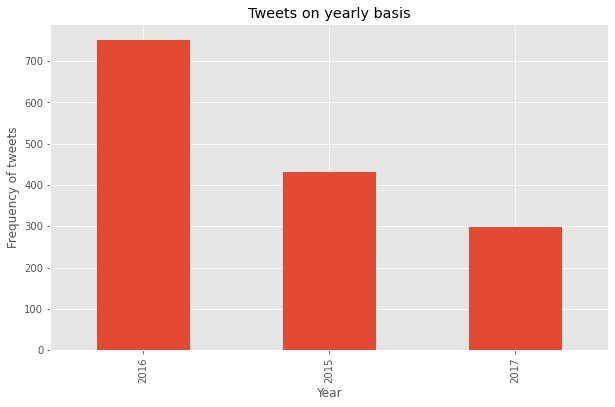

In [290]:
tweet_per_year.plot(kind='bar', figsize=(10,6), xlabel="Year", ylabel="Frequency of tweets", title="Tweets on yearly basis")

> **From the bar chart, it is discovered that the year 2016 recorded the most number of tweets, followed by the years 2015 and 2017 respectively**

### Question 2: What kind of devices were the tweets posted from?

In [341]:
devices = twitter_archive_master.source.value_counts()
devices

Twitter for iPhone    1454
Twitter Web Client      19
TweetDeck                9
Name: source, dtype: int64

<AxesSubplot:title={'center':'Devices most used for tweets'}, xlabel='Device/ Source used', ylabel='Frequency'>

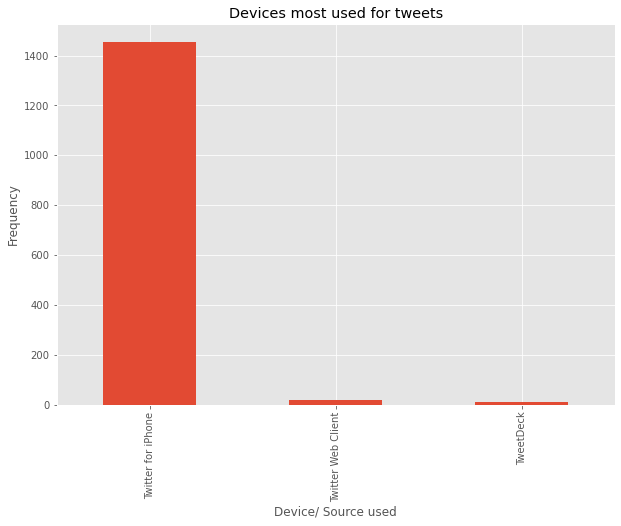

In [350]:
devices.plot(kind='bar', figsize=(10,7), xlabel='Device/ Source used', ylabel='Frequency', title='Devices most used for tweets')

> **From the bar chart, it can be deduced that tweets from Twitter for Iphones were the highest, followed by Twitter  web clients and TweetDeck respectively**

### Question 3 :  Which Dogs had the highest tweet ratings ( Top 10)?

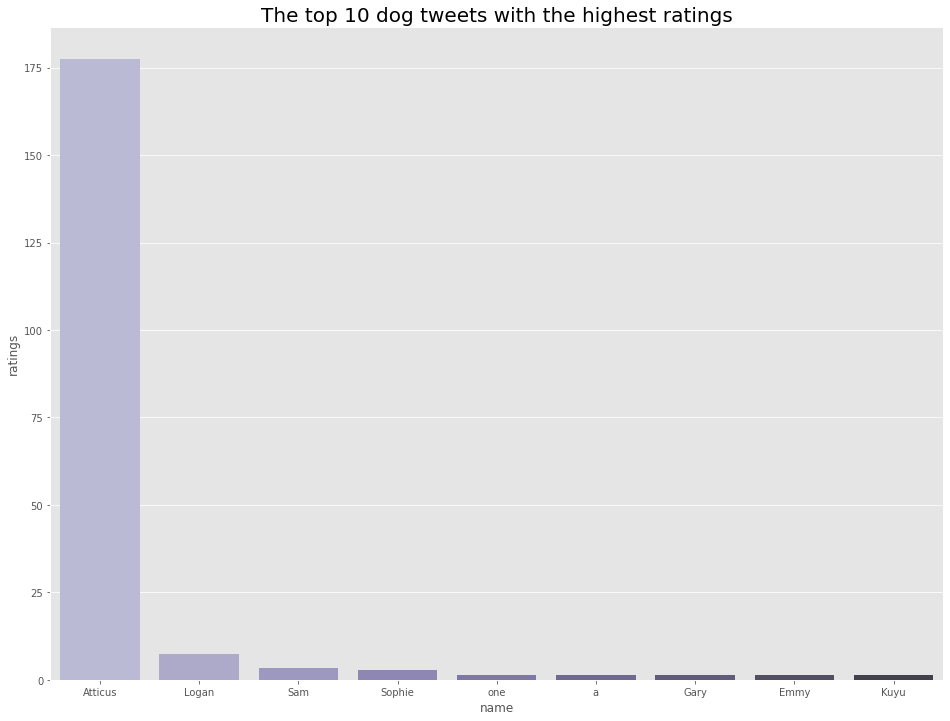

In [370]:
funct.top_plot(twitter_archive_master, 'name', 'ratings', 'The top 10 dog tweets with the highest ratings', 10) 

> **From the bar chart, the top 10 dog tweets were Atticus, Logan, Sam, Sophie, to mention but a few respectively. However, from 5th place to 6th place are names of dogs which was probably a typing mistake or rare names people call their dogs.**

### Question 4:  What is the nature of tweets on a daily basis from 2015 to date?

In [373]:
tweets_per_day

2015-11-28    19
2015-12-01    18
2015-11-23    18
2015-11-25    16
2015-11-29    16
              ..
2016-05-14     1
2016-05-12     1
2016-09-25     1
2017-02-19     1
2016-09-16     1
Name: day, Length: 560, dtype: int64

<AxesSubplot:title={'center':'Tweets on yearly basis'}, xlabel='Day', ylabel='Frequency of tweets'>

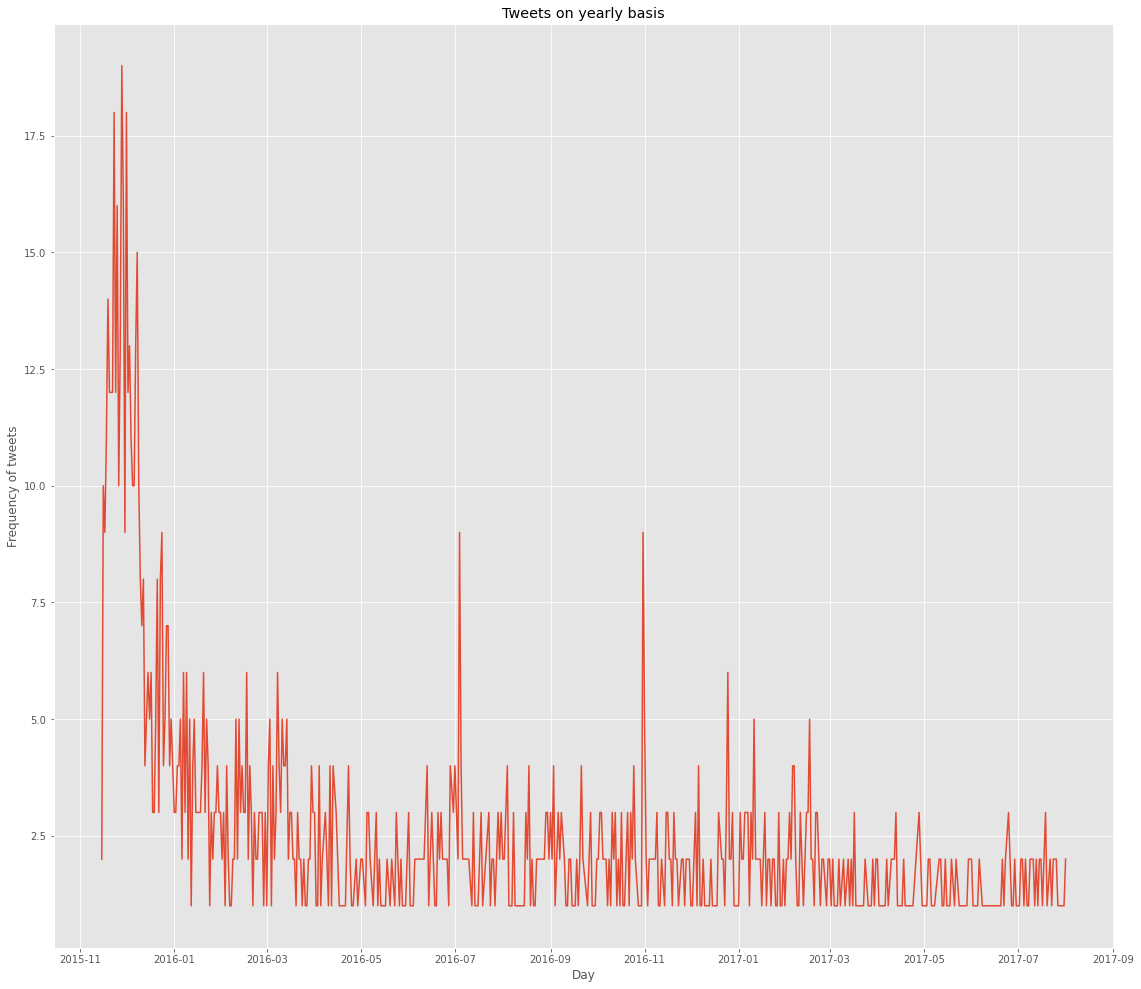

In [372]:
tweets_per_day.plot(kind='line', figsize=(19,17), xlabel="Day", ylabel="Frequency of tweets", title="Tweets on yearly basis")

> **From this line chart, it can be deductedb that there is a sharp drop in number of tweets from 2015-11 to 2026-01 and a gradual rise and drop in the tweets from 2016-03 to 2017-09**

<a id='conclusions'></a>
# Conclusions:

- #### Question 1: How many tweets sent on yearly?
From the data exploratory analysis perform, we found that years 2016, 2015 and 2017 recorded 752 tweets,431 tweets and 299 tweets respectively.
From the bar chart visiualized based on these figures, it is discovered that the year 2016 recorded the most number of tweets, followed by the years 2015 and 2017 respectively

- #### Question 2: What kind of devices were the tweets posted from?
Figuratively, sources of tweets from Twitter for iPhone was 1454, followed by Twitter Web Client which also was 19 and tweets from TweetDeck recorded was 9.
From the bar chart visiualized based on this figures, it can be deduced that tweets from Twitter for Iphones were the highest, followed by Twitter web clients and TweetDeck respectively

- #### Question 3: Which Dogs had the highest tweet ratings ( Top 10)?
From the bar chart, the top 10 dog tweets were Atticus, Logan, Sam, Sophie, to mention but a few respectively. However, from 5th place to 6th place are names of dogs which was probably a typing mistake or rare names people call their dogs.
- #### Question 4: What is the nature of tweets on a daily basis from 2015 till date?
From this line chart visualized based on this question, it can be deduced that there is a sharp drop in number of tweets from 2015-11 to 2026-01 and a gradual rise and drop in the tweets from 2016-03 to 2017-09

<a id='limitation'></a>
# Limitations:
> I struggled with fully grasping what some of the columns in the datasets represented; for example, `p1_conf` column, `p2_conf` column, to mention but a few. Again, there was 0 non-null values in `favourite_count` column in tweets data downloaded using tweepy (twitter API) which was a vital part of the data but was not present because it had NaN values. Another limitation was that the datasets were very huge (numerous records) hence assessing and cleaning was very difficult to carry out.

<a id='references'></a>
# References

- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://www.youtube.com/watch?v=bNDRiaFyLrs&t=28s
- https://www.youtube.com/watch?v=Lu1nskBkPJU
- https://medium.com/analytics-vidhya/fetch-tweets-using-their-ids-with-tweepy-twitter-api-and-python-ee7a22dcb845
- https://stackoverflow.com/questions/54407027/use-api-to-write-to-json-file
- https://www.geeksforgeeks.org/python-convert-tsv-to-csv-file/
- https://sparkbyexamples.com/pandas/pandas-change-string-object-to-date-in-dataframe/
- https://stackoverflow.com/questions/44116194/import-a-function-from-another-ipynb-file